In [25]:
import pickle
import json, sys, random
import numpy as np
import tensorflow as tf


In [26]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw 

In [27]:
from tensorflow.keras.models import load_model

model=load_model('model.h5')

In [28]:
image = Image.open('sample_input.png')
pix = image.load()

In [29]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [30]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [31]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

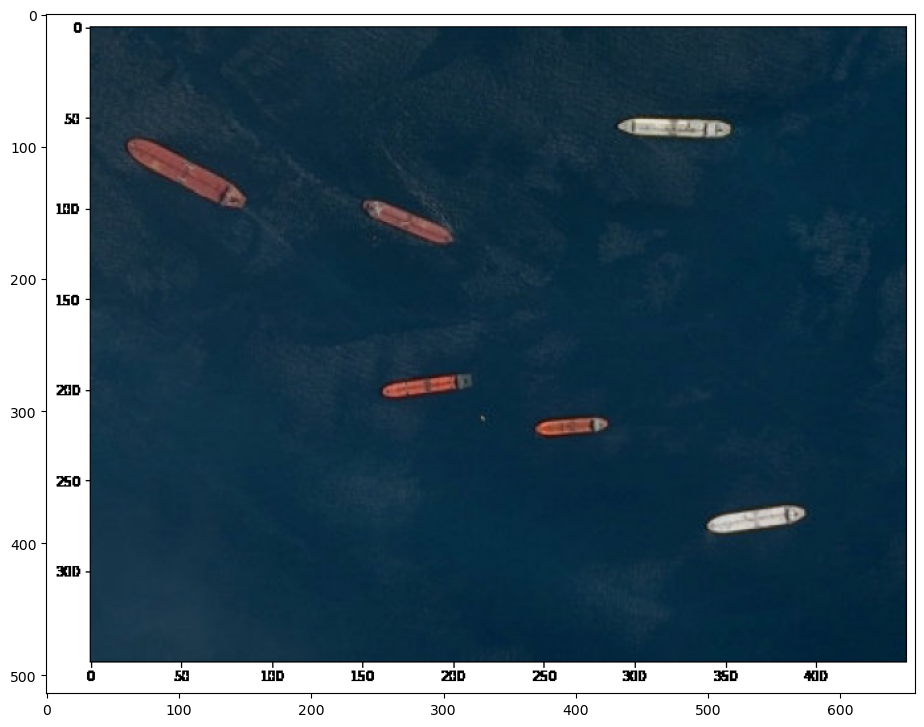

In [32]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [33]:
picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor.shape

(3, 514, 657)

In [34]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [35]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [36]:
def show_ship(x, y, acc, thickness=3):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

1/1 [==============================] - 0s 20ms/step
[[0.01286475 0.98713523]]
0


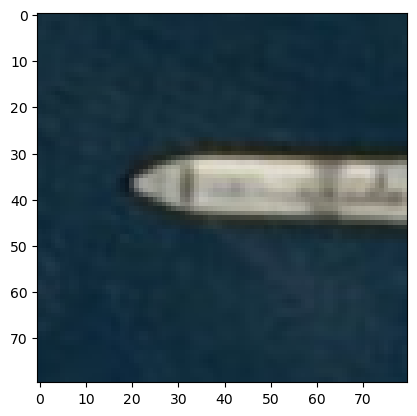

1/1 [==============================] - 0s 36ms/step
[[0.02183632 0.9781637 ]]
0


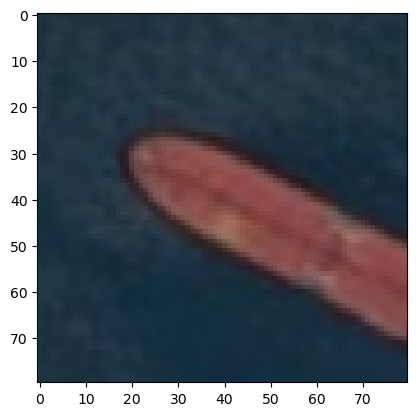

1/1 [==============================] - 0s 35ms/step
[[1.4439860e-04 9.9985564e-01]]
0


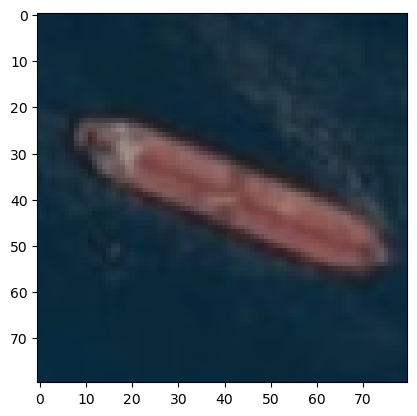

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 25ms/step
[[9.733272e-05 9.999026e-01]]
0


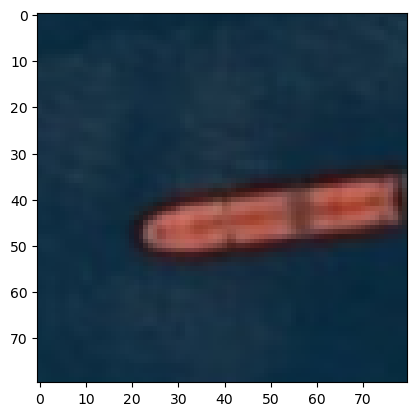

1/1 [==============================] - 0s 15ms/step
[[0.04985432 0.95014566]]
0


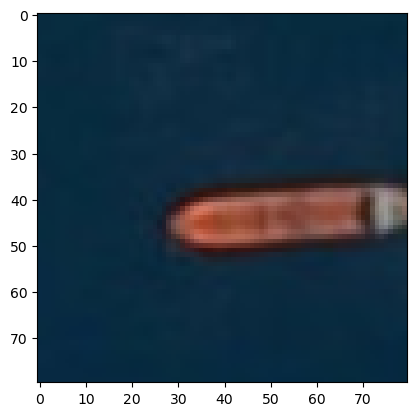

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 13ms/step


In [2]:
step = 10
coordinates = []
counter=0
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            print(++counter)
            plt.imshow(area[0])
            plt.show()

In [37]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

C:\Users\Dell\AppData\Local\Temp\ipykernel_23764\1238346152.py:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  picture_tensor[ch][y+i][x-th] = -1
C:\Users\Dell\AppData\Local\Temp\ipykernel_23764\1238346152.py:10: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  picture_tensor[ch][y+i][x+th+80] = -1
C:\Users\Dell\AppData\Local\Temp\ipykernel_23764\1238346152.py:15: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.


In [38]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(514, 657, 3)

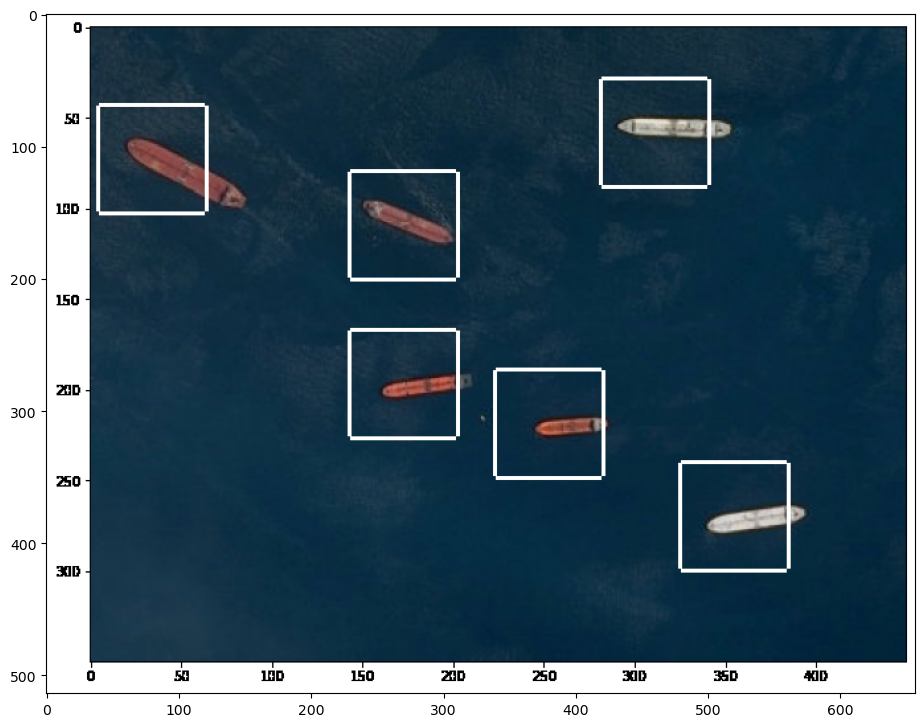

In [39]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)
#plt.imsave("pic.png",picture_tensor)
plt.show()

1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 51ms/step
[[8.2510733e-04 9.9917489e-01]]
0


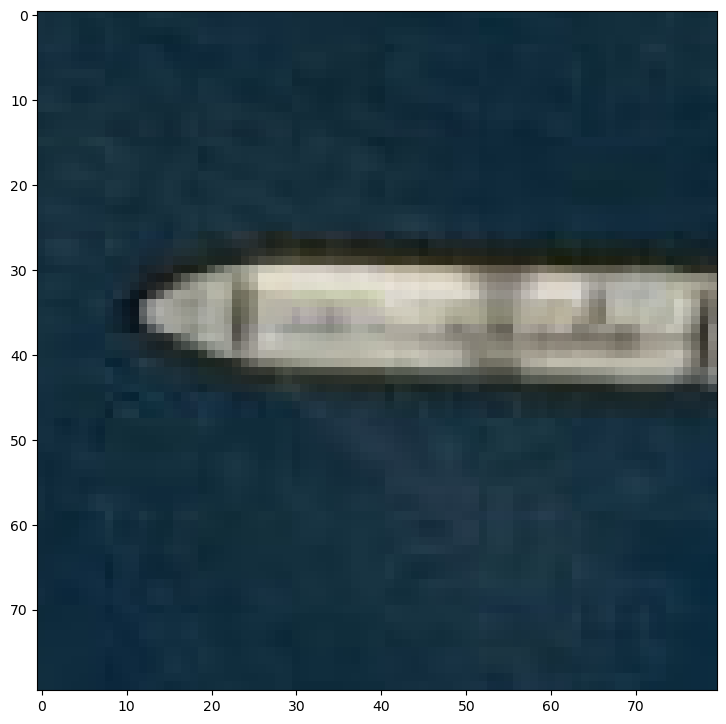

1/1 [==============================] - 0s 47ms/step
[[0.04088028 0.95911974]]
0


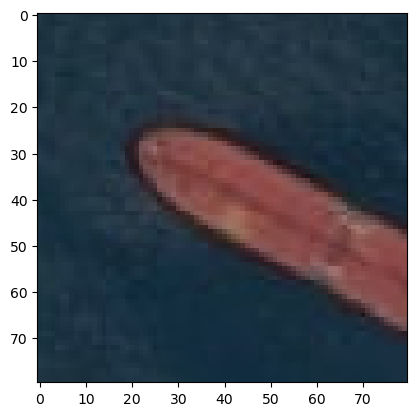

1/1 [==============================] - 0s 60ms/step
[[0.00203248 0.99796754]]
0


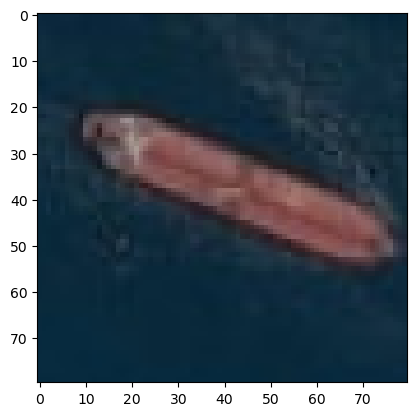

1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 77ms/step
[[1.738853e-05 9.999826e-01]]
0


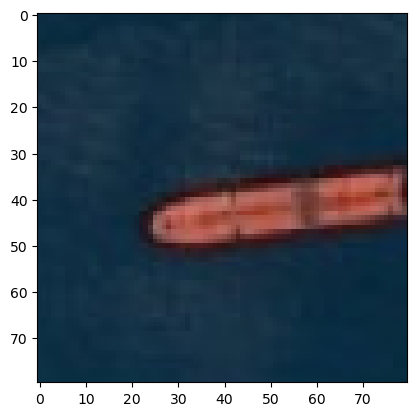

1/1 [==============================] - 0s 46ms/step
[[0.00831062 0.9916893 ]]
0


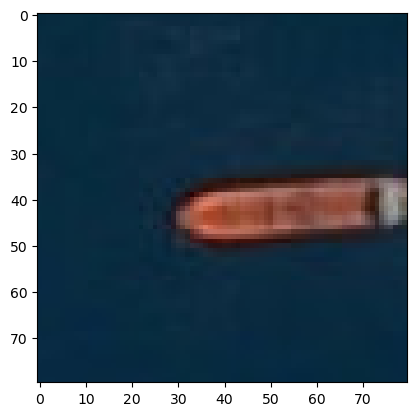

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 55ms/step
[[0.07458301 0.925417  ]]
0


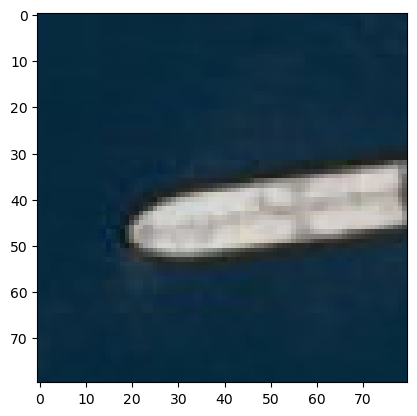

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 116ms/step


C:\Users\Dell\AppData\Local\Temp\ipykernel_16716\1399006621.py:68: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  picture_tensor[ch][y+i][x-th] = -1
C:\Users\Dell\AppData\Local\Temp\ipykernel_16716\1399006621.py:73: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  picture_tensor[ch][y+i][x+th+80] = -1
C:\Users\Dell\AppData\Local\Temp\ipykernel_16716\1399006621.py:78: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.

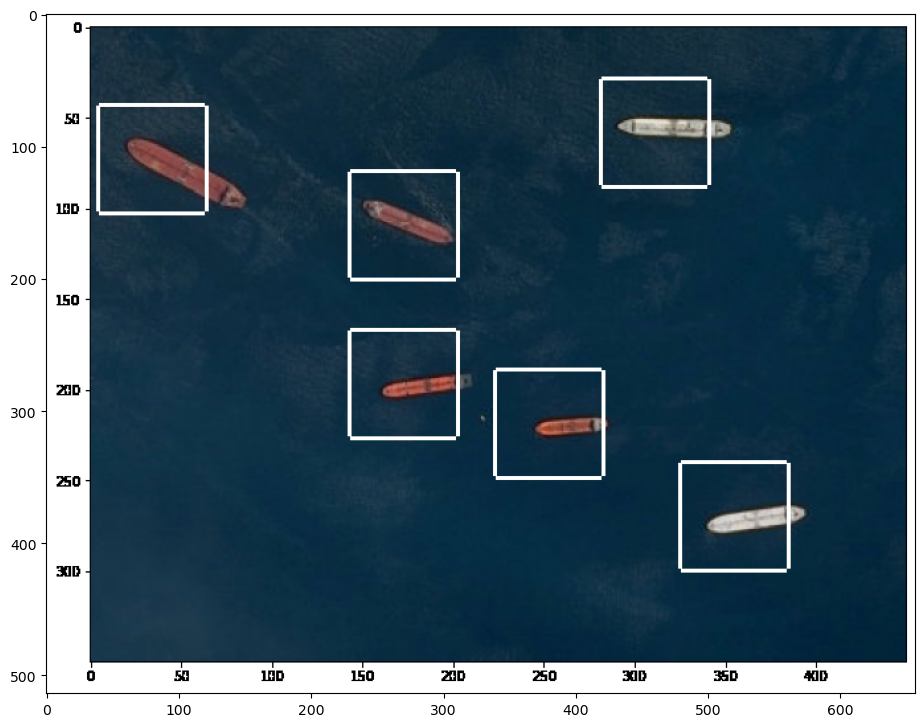

In [1]:
# Predicted Using model
import pickle
import json, sys, random
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw 

from tensorflow.keras.models import load_model

model=load_model('model.h5')

image = Image.open('sample_input.png')
pix = image.load()

n_spectrum = 3
width = image.size[0]
height = image.size[1]

# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])
            

picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
#plt.imshow(picture_tensor)

#plt.show()

picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor.shape

def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study


def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result


def show_ship(x, y, acc, thickness=3):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

                
step = 10
coordinates = []
counter=0
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            print(++counter)
            plt.imshow(area[0])
            plt.show()
            
            
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])
    
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)
#plt.imsave("pic.png",picture_tensor)
plt.show()

1/1 [==============================] - 0s 47ms/step


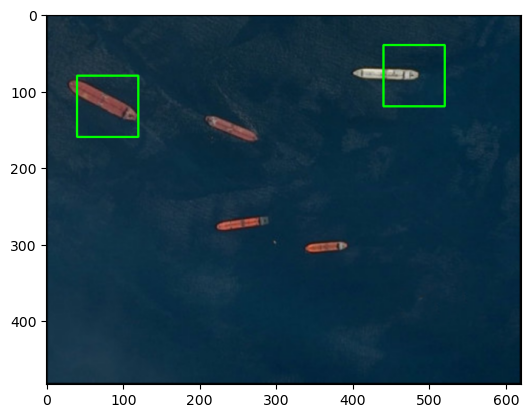

In [29]:
# Used for Python Flask
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Load the pre-trained model
model = load_model('model.h5')

# Load the input image
image_path = 'sample_input-1.png'
image = Image.open(image_path)

image_rgb = image.convert("RGB")  # Convert to RGB if not already
image_rgb = np.array(image_rgb)

#image_rgb = np.array(image)

# Define patch and step sizes
patch_size = 80
step_size = 40

# Detect ships using the trained model
ship_candidates = []
for y in range(0, image_rgb.shape[0] - patch_size + 1, step_size):
    for x in range(0, image_rgb.shape[1] - patch_size + 1, step_size):
        patch = image_rgb[y:y+patch_size, x:x+patch_size]
        input_data = patch[np.newaxis, ...]
        prediction = model.predict(input_data)
        if prediction[0][1] > 0.90:
            ship_candidates.append((x, y))

# Apply Non-Maximum Suppression
def non_max_suppression(boxes, overlap_threshold=0.5):
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes)
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = x1 + patch_size
    y2 = y1 + patch_size

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    scores = [1.0] * len(boxes)

    sorted_indices = np.argsort(scores)
    selected_indices = []

    while len(sorted_indices) > 0:
        last = len(sorted_indices) - 1
        i = sorted_indices[last]
        selected_indices.append(i)

        xx1 = np.maximum(x1[i], x1[sorted_indices[:last]])
        yy1 = np.maximum(y1[i], y1[sorted_indices[:last]])
        xx2 = np.minimum(x2[i], x2[sorted_indices[:last]])
        yy2 = np.minimum(y2[i], y2[sorted_indices[:last]])

        width = np.maximum(0, xx2 - xx1 + 1)
        height = np.maximum(0, yy2 - yy1 + 1)
        overlap = (width * height) / areas[sorted_indices[:last]]

        sorted_indices = np.delete(sorted_indices, np.concatenate(([last], np.where(overlap > overlap_threshold)[0])))

    return [ship_candidates[i] for i in selected_indices]

# Apply NMS to get final ship coordinates
final_ship_coordinates = non_max_suppression(ship_candidates)

# Draw bounding boxes around detected ships
for coord in final_ship_coordinates:
    x, y = coord
    cv2.rectangle(image_rgb, (x, y), (x + patch_size, y + patch_size), (0, 255, 0), 2)

# Display the result
plt.imshow(image_rgb)
plt.show()
